# Bitcoin Price Prediction Model

### Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_csv('totalData.csv')
#Drop np.nan
df.dropna(how='any', inplace=True)

#Make it array
#IT IS IMPORTANT TARGET BE FIRST SO WE CAN ISOLATE IT ON CREATE_DATASET FUNCTION
dataset = df[['Close', 'Score', 'Trends', 'Number']]

In [3]:
dataset.dtypes

Close     float64
Score     float64
Trends    float64
Number      int64
dtype: object

In [4]:
datavalues = dataset.values

In [5]:
dataset

,Close,Score,Trends,Number
0,998.325012,0.884918,14.000000,256
1,1021.750000,1.018706,27.000000,351
2,1043.839966,0.900894,24.000000,490
3,1154.729980,0.863922,26.000000,336
4,1013.380005,0.254463,32.000000,408
...,...,...,...,...
1457,27084.808590,0.868294,162.920875,379
1458,27362.437500,0.765014,136.111111,338
1459,28840.953130,0.826808,156.734007,265
1460,29001.720700,0.902876,152.609428,272


In [6]:
datavalues

array([[9.98325012e+02, 8.84917842e-01, 1.40000000e+01, 2.56000000e+02],
       [1.02175000e+03, 1.01870579e+00, 2.70000000e+01, 3.51000000e+02],
       [1.04383997e+03, 9.00894029e-01, 2.40000000e+01, 4.90000000e+02],
       ...,
       [2.88409531e+04, 8.26808191e-01, 1.56734007e+02, 2.65000000e+02],
       [2.90017207e+04, 9.02875622e-01, 1.52609428e+02, 2.72000000e+02],
       [2.93741523e+04, 3.21023532e-01, 1.52609428e+02, 2.56000000e+02]])

### Split and Create dataset

In [7]:
# split into train and test sets
train_size = int(len(datavalues) * 0.80)
test_size = len(datavalues) - train_size
train, test = datavalues[0:train_size,:], datavalues[train_size:len(datavalues),:]

In [8]:
train.shape

(1169, 4)

In [9]:
test.shape

(293, 4)

### Normalize the dataset and record the price scalar for rescal prediction

In [10]:
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [99]:
from pickle import dump

In [100]:
dump(scaler, open('scaler.pkl', 'wb'))

In [12]:
#train

In [13]:
#train_scaled

In [14]:
#test

#### normalize testing data using training data scalar

In [15]:
test_scaled = scaler.transform(test)

In [16]:
test_scaled

array([[0.24650886, 0.23383233, 0.10714286, 0.08652546],
       [0.22632498, 0.14790252, 0.14729781, 0.06038756],
       [0.23760455, 0.47052254, 0.11186697, 0.07706174],
       ...,
       [1.49913092, 0.66431238, 0.24614627, 0.091032  ],
       [1.50771909, 0.70950913, 0.23913168, 0.09418657],
       [1.52761432, 0.36379187, 0.23913168, 0.08697612]])

In [17]:
scaler.min_,scaler.scale_

(array([-0.04154764,  0.1730503 , -0.02040816, -0.02839117]),
 array([5.34198211e-05, 5.94166918e-01, 1.70068027e-03, 4.50653447e-04]))

In [18]:
predictionScalar = MinMaxScaler()
predictionScalar.min_ = scaler.min_[0]
predictionScalar.scale_ = scaler.scale_[0]

In [19]:
y_inverse = train_scaled[:,0]

In [20]:
y_inverse

array([0.0117827 , 0.01303406, 0.0142141 , ..., 0.22399097, 0.25566459,
       0.23625499])

In [21]:
yr = np.reshape(y_inverse,(1,-1))

In [22]:
yr

array([[0.0117827 , 0.01303406, 0.0142141 , ..., 0.22399097, 0.25566459,
        0.23625499]])

In [23]:
ryp = predictionScalar.inverse_transform(yr)

In [24]:
ryp[0]

array([ 998.325012, 1021.75    , 1043.839966, ..., 4970.788086,
       5563.707031, 5200.366211])

In [25]:
price = train[:,0]

In [26]:
price

array([ 998.325012, 1021.75    , 1043.839966, ..., 4970.788086,
       5563.707031, 5200.366211])

In [27]:
math.sqrt(mean_squared_error(price, ryp[0]))

3.3345494017868217e-13

In [28]:
price[1]-ryp[0][1]

0.0

In [29]:
price[1]

1021.75

In [30]:
ryp[0][1]

1021.75

In [31]:
def create_dataset(dataset, look_back=1):

        dataX, dataY = [], []
        for i in range(len(dataset)-look_back):

            #The target is always the next value. And the lookback are the previous prices
            a = dataset[i:(i+look_back), :]
            dataX.append(a)
            dataY.append([dataset[i + look_back, :][0]]) #WHATCH OUT WE ISOLATE THE TARGET WITH [0] SO IT MUST BE 1ST

        return np.array(dataX), np.array(dataY)

In [32]:
# after testing look_epoch = 1 is enough

In [33]:
look_back= 1
lstm1_neurons = 32
lstm1_dropout = 0.0006067792987999934
lstm1_recurrent_dropout = 0.46202765620423925
lstm2_neurons = 64
lstm2_dropout = 0.16269564959981841
lstm2_recurrent_dropout = 0.658267704837993
dense_neurons = 512
batch_size = 1

In [34]:
# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train_scaled, look_back)
testX, testY = create_dataset(test_scaled, look_back)

In [35]:
trainY.shape

(1168, 1)

In [36]:
trainX[0][0]

array([0.0117827 , 0.69883921, 0.00340136, 0.08697612])

In [37]:
trainY[0]

array([0.01303406])

In [38]:
trainX.shape,trainY.shape

((1168, 1, 4), (1168, 1))

In [39]:
testX.shape, testY.shape

((292, 1, 4), (292, 1))

In [40]:
# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
# testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

In [41]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [42]:
# make training and test sets in torch
x_train = torch.from_numpy(trainX).type(torch.Tensor)
x_test = torch.from_numpy(testX).type(torch.Tensor)
y_train = torch.from_numpy(trainY).type(torch.Tensor)
y_test = torch.from_numpy(testY).type(torch.Tensor)

In [43]:
y_train.size(),x_train.size()

(torch.Size([1168, 1]), torch.Size([1168, 1, 4]))

In [44]:
y_test.size(),x_test.size()

(torch.Size([292, 1]), torch.Size([292, 1, 4]))

### Model

In [45]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: GeForce RTX 2060


In [67]:
# Build model
input_dim = 4
hidden_dim_1 = 32
hidden_dim_2 = 64 
hidden_dim_3 = 512
num_layers = 1
output_dim = 1

In [68]:
# Here we define our Bitcoin Price prediction model
class BitcoinPrediction(nn.Module):
    def __init__(self, input_dim,  hidden_dim_1, hidden_dim_2, hidden_dim_3, num_layers, output_dim):
        super(BitcoinPrediction, self).__init__()
        #neurons
        self.input_dim = input_dim
        
        self.hidden_dim_1 = hidden_dim_1
        
        self.hidden_dim_2 = hidden_dim_2
        
        self.hidden_dim_3 = hidden_dim_3
        
        self.num_layers = num_layers
        
        self.outpu_dim = output_dim
        
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_1, num_layers, batch_first = True)  
        
        self.lstm2 = nn.LSTM(hidden_dim_1, hidden_dim_2, num_layers, batch_first = True)
        
        self.dense = nn.Linear(hidden_dim_2, hidden_dim_3)
        
        self.fc = nn.Linear(hidden_dim_3, output_dim)
        
    def forward(self, X):
        
        # Initialize hidden state with zeros
        h1 = torch.zeros(self.num_layers, X.size(0), self.hidden_dim_1).requires_grad_()

        # Initialize cell state
        c1 = torch.zeros(self.num_layers,X.size(0), self.hidden_dim_1).requires_grad_()
        
        # Initialize hidden state with zeros
        h2 = torch.zeros(self.num_layers, X.size(0), self.hidden_dim_2).requires_grad_()

        # Initialize cell state
        c2 = torch.zeros(self.num_layers, X.size(0), self.hidden_dim_2).requires_grad_()
        
        output1, (h1, c1) = self.lstm1(X, (h1.detach(), c1.detach()))
        
        ouput2, (h2, c2) = self.lstm2(output1, (h2.detach(), c2.detach()))
        
        #just want last time step hidden states
        out = self.dense(ouput2[:, -1, :])
        
        out = self.fc(out)
        
        return out

In [69]:
model = BitcoinPrediction(input_dim=input_dim, hidden_dim_1=hidden_dim_1,hidden_dim_2 = hidden_dim_2,hidden_dim_3 = hidden_dim_3,output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

BitcoinPrediction(
  (lstm1): LSTM(4, 32, batch_first=True)
  (lstm2): LSTM(32, 64, batch_first=True)
  (dense): Linear(in_features=64, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
12
torch.Size([128, 4])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([256, 32])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([64, 64])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [70]:
num_epochs = 1000

In [71]:
x_train.size(0)

1168

In [72]:
# Train model
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    #print("Epoch ", t, "MSE: ", loss.item())
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  10 MSE:  0.03220866248011589
Epoch  20 MSE:  0.01599428616464138
Epoch  30 MSE:  0.0030785510316491127
Epoch  40 MSE:  0.0009884447790682316
Epoch  50 MSE:  0.0008974398951977491
Epoch  60 MSE:  0.0005981381982564926
Epoch  70 MSE:  0.00040450957021676004
Epoch  80 MSE:  0.00040282646659761667
Epoch  90 MSE:  0.0003901660966221243
Epoch  100 MSE:  0.0003801993443630636
Epoch  110 MSE:  0.00037963571958243847
Epoch  120 MSE:  0.00037760718259960413
Epoch  130 MSE:  0.0003772642812691629
Epoch  140 MSE:  0.00037691343459300697
Epoch  150 MSE:  0.0003767828457057476
Epoch  160 MSE:  0.00037668051663786173
Epoch  170 MSE:  0.00037660280941054225
Epoch  180 MSE:  0.00037653668550774455
Epoch  190 MSE:  0.0003764748980756849
Epoch  200 MSE:  0.00037641532253473997
Epoch  210 MSE:  0.00037635816261172295
Epoch  220 MSE:  0.0003763028944376856
Epoch  230 MSE:  0.00037624966353178024
Epoch  240 MSE:  0.00037619800423271954
Epoch  250 MSE:  0.0003761481202673167
Epoch  260 MSE:  0.0003760

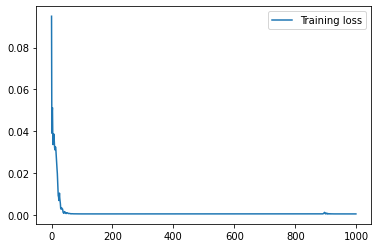

In [73]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [77]:
# test MSE
testScore = math.sqrt(mean_squared_error(y_test_pred.detach().numpy().reshape(1,-1), y_test.detach().numpy().reshape(1,-1)))

In [78]:
testScore

0.05039208561606444

In [76]:
# make predictions
y_test_pred = model(x_test)

In [58]:
sss = y_train_pred.detach().numpy().reshape(1,-1)

In [59]:
predictionScalar.inverse_transform(sss).shape

(1, 1168)

In [79]:
# invert predictions
y_train_predI = predictionScalar.inverse_transform(y_train_pred.detach().numpy().reshape(1,-1))
y_trainI = predictionScalar.inverse_transform(y_train.detach().numpy().reshape(1,-1))
y_test_predI = predictionScalar.inverse_transform(y_test_pred.detach().numpy().reshape(1,-1))
y_testI = predictionScalar.inverse_transform(y_test.detach().numpy().reshape(1,-1))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_trainI, y_train_predI))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_testI, y_test_predI))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 361.93 RMSE
Test Score: 943.32 RMSE


In [80]:
y_testI[0]

array([ 5014.48  ,  5225.6294,  5238.4385,  6191.1924,  6198.779 ,
        6185.066 ,  5830.2554,  6416.315 ,  6734.8037,  6681.0625,
        6716.4404,  6469.798 ,  6242.1934,  5922.0425,  6429.842 ,
        6438.644 ,  6606.7764,  6793.6245,  6733.3867,  6867.527 ,
        6791.1294,  7271.781 ,  7176.414 ,  7334.098 ,  7302.089 ,
        6865.4927,  6859.0825,  6971.0923,  6845.037 ,  6842.4272,
        6642.1094,  7116.8037,  7096.184 ,  7257.665 ,  7189.4243,
        6881.958 ,  6880.3237,  7117.2075,  7429.7246,  7550.9004,
        7569.9355,  7679.8677,  7795.6006,  7807.0586,  8801.038 ,
        8658.553 ,  8864.767 ,  8988.597 ,  8897.469 ,  8912.654 ,
        9003.07  ,  9268.762 ,  9951.519 ,  9842.665 ,  9593.8955,
        8756.43  ,  8601.796 ,  8804.478 ,  9269.987 ,  9733.722 ,
        9328.197 ,  9377.014 ,  9670.738 ,  9726.575 ,  9729.038 ,
        9522.981 ,  9081.762 ,  9182.577 ,  9209.287 ,  8790.367 ,
        8906.934 ,  8835.052 ,  9181.017 ,  9525.751 ,  9439.1

In [83]:
len(df)

1462

In [84]:
len(y_test)

292

In [87]:
df.Date[1:len(df)-len(y_test)].values

array(['2017/1/2', '2017/1/3', '2017/1/4', ..., '2020/3/13', '2020/3/14',
       '2020/3/15'], dtype=object)

In [89]:
y_testI[0]

array([ 5014.48  ,  5225.6294,  5238.4385,  6191.1924,  6198.779 ,
        6185.066 ,  5830.2554,  6416.315 ,  6734.8037,  6681.0625,
        6716.4404,  6469.798 ,  6242.1934,  5922.0425,  6429.842 ,
        6438.644 ,  6606.7764,  6793.6245,  6733.3867,  6867.527 ,
        6791.1294,  7271.781 ,  7176.414 ,  7334.098 ,  7302.089 ,
        6865.4927,  6859.0825,  6971.0923,  6845.037 ,  6842.4272,
        6642.1094,  7116.8037,  7096.184 ,  7257.665 ,  7189.4243,
        6881.958 ,  6880.3237,  7117.2075,  7429.7246,  7550.9004,
        7569.9355,  7679.8677,  7795.6006,  7807.0586,  8801.038 ,
        8658.553 ,  8864.767 ,  8988.597 ,  8897.469 ,  8912.654 ,
        9003.07  ,  9268.762 ,  9951.519 ,  9842.665 ,  9593.8955,
        8756.43  ,  8601.796 ,  8804.478 ,  9269.987 ,  9733.722 ,
        9328.197 ,  9377.014 ,  9670.738 ,  9726.575 ,  9729.038 ,
        9522.981 ,  9081.762 ,  9182.577 ,  9209.287 ,  8790.367 ,
        8906.934 ,  8835.052 ,  9181.017 ,  9525.751 ,  9439.1

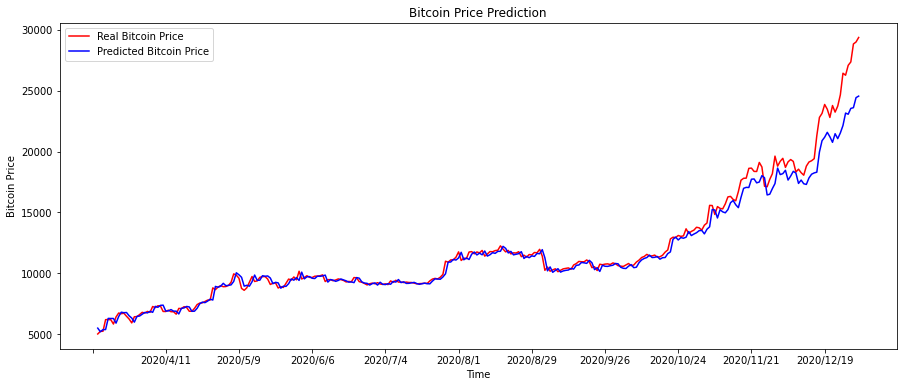

In [97]:
# Visualising the results
import matplotlib.dates as mdates

figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df.Date[len(df)-len(y_test):].values,y_testI[0], color = 'red', label = 'Real Bitcoin Price')
axes.plot(y_test_predI[0], color = 'blue', label = 'Predicted Bitcoin Price')
#axes.xticks(np.arange(0,394,50))
axes.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.savefig('ibm_pred.png')
plt.show()

In [63]:
#Saving your model.
output_file = ".model_bitcoinprice_prediction.pth"

In [64]:
def save(model, optimizer):
    # save
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, output_file)

save(model, optimizer)

In [68]:
class GRUNet(nn.Module):
 
    def __init__(self, input_size):
        super(GRUNet, self).__init__()
        self.rnn = nn.GRU(
            input_size=input_size,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )
        self.out = nn.Sequential(
            nn.Linear(128, 1)
        )
 
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)  # None 表示 hidden state 会用全0的 state
        out = self.out(r_out[:, -1])
        print(out.shape)
        return out
 

In [69]:
features = 4

In [70]:
batch_size = 32
num_epochs = 100 #n_iters / (len(train_X) / batch_size)

trainT = torch.utils.data.TensorDataset(x_train,y_train)
testT = torch.utils.data.TensorDataset(x_test,y_test)

train_loader = torch.utils.data.DataLoader(dataset=trainT, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=testT, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [73]:
net = GRUNet(features)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.001)
# start training
for e in range(200):
    for i, (X, y) in enumerate(train_loader):
        var_x = Variable(X)
        var_y = Variable(y)
        # forward
        out = net(var_x)
        loss = criterion(out, var_y)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.item()))
        hist[e] = loss.item()
        if (e + 1) % 100 == 0:  # 每 100 次输出结果
            torch.save(obj=net.state_dict(), f='lstmnetpro_gru_%d.pth' % (e + 1))

torch.Size([32, 1])
Epoch: 1, Loss: 0.00130
torch.Size([32, 1])
Epoch: 1, Loss: 0.00054
torch.Size([32, 1])
Epoch: 1, Loss: 0.00049
torch.Size([32, 1])
Epoch: 1, Loss: 0.00016
torch.Size([32, 1])
Epoch: 1, Loss: 0.00270
torch.Size([32, 1])
Epoch: 1, Loss: 0.00334
torch.Size([32, 1])
Epoch: 1, Loss: 0.00890
torch.Size([32, 1])
Epoch: 1, Loss: 0.02159
torch.Size([32, 1])
Epoch: 1, Loss: 0.02928
torch.Size([32, 1])
Epoch: 1, Loss: 0.07937
torch.Size([32, 1])
Epoch: 1, Loss: 0.45778
torch.Size([32, 1])
Epoch: 1, Loss: 0.43358
torch.Size([32, 1])
Epoch: 1, Loss: 0.18664
torch.Size([32, 1])
Epoch: 1, Loss: 0.16671
torch.Size([32, 1])
Epoch: 1, Loss: 0.11184
torch.Size([32, 1])
Epoch: 1, Loss: 0.12616
torch.Size([32, 1])
Epoch: 1, Loss: 0.06943
torch.Size([32, 1])
Epoch: 1, Loss: 0.08314
torch.Size([32, 1])
Epoch: 1, Loss: 0.06564
torch.Size([32, 1])
Epoch: 1, Loss: 0.05999
torch.Size([32, 1])
Epoch: 1, Loss: 0.05735
torch.Size([32, 1])
Epoch: 1, Loss: 0.02263
torch.Size([32, 1])
Epoch: 1, Lo

torch.Size([32, 1])
Epoch: 6, Loss: 0.00108
torch.Size([32, 1])
Epoch: 6, Loss: 0.00060
torch.Size([32, 1])
Epoch: 6, Loss: 0.00042
torch.Size([32, 1])
Epoch: 6, Loss: 0.00655
torch.Size([32, 1])
Epoch: 6, Loss: 0.01259
torch.Size([32, 1])
Epoch: 6, Loss: 0.01459
torch.Size([32, 1])
Epoch: 6, Loss: 0.01121
torch.Size([32, 1])
Epoch: 6, Loss: 0.00559
torch.Size([32, 1])
Epoch: 6, Loss: 0.00224
torch.Size([32, 1])
Epoch: 6, Loss: 0.01270
torch.Size([32, 1])
Epoch: 6, Loss: 0.06217
torch.Size([32, 1])
Epoch: 6, Loss: 0.04996
torch.Size([32, 1])
Epoch: 6, Loss: 0.04076
torch.Size([32, 1])
Epoch: 6, Loss: 0.01151
torch.Size([32, 1])
Epoch: 6, Loss: 0.01612
torch.Size([32, 1])
Epoch: 6, Loss: 0.00354
torch.Size([32, 1])
Epoch: 6, Loss: 0.01203
torch.Size([32, 1])
Epoch: 6, Loss: 0.02749
torch.Size([12, 1])
Epoch: 6, Loss: 0.01092
torch.Size([32, 1])
Epoch: 7, Loss: 0.06862
torch.Size([32, 1])
Epoch: 7, Loss: 0.06282
torch.Size([32, 1])
Epoch: 7, Loss: 0.06298
torch.Size([32, 1])
Epoch: 7, Lo

Epoch: 11, Loss: 0.00207
torch.Size([32, 1])
Epoch: 11, Loss: 0.00800
torch.Size([32, 1])
Epoch: 11, Loss: 0.04659
torch.Size([32, 1])
Epoch: 11, Loss: 0.03706
torch.Size([32, 1])
Epoch: 11, Loss: 0.02982
torch.Size([32, 1])
Epoch: 11, Loss: 0.00716
torch.Size([32, 1])
Epoch: 11, Loss: 0.01073
torch.Size([32, 1])
Epoch: 11, Loss: 0.00167
torch.Size([32, 1])
Epoch: 11, Loss: 0.00787
torch.Size([32, 1])
Epoch: 11, Loss: 0.01948
torch.Size([12, 1])
Epoch: 11, Loss: 0.00777
torch.Size([32, 1])
Epoch: 12, Loss: 0.06647
torch.Size([32, 1])
Epoch: 12, Loss: 0.06127
torch.Size([32, 1])
Epoch: 12, Loss: 0.06176
torch.Size([32, 1])
Epoch: 12, Loss: 0.05433
torch.Size([32, 1])
Epoch: 12, Loss: 0.04056
torch.Size([32, 1])
Epoch: 12, Loss: 0.03575
torch.Size([32, 1])
Epoch: 12, Loss: 0.02810
torch.Size([32, 1])
Epoch: 12, Loss: 0.01417
torch.Size([32, 1])
Epoch: 12, Loss: 0.01055
torch.Size([32, 1])
Epoch: 12, Loss: 0.00146
torch.Size([32, 1])
Epoch: 12, Loss: 0.10442
torch.Size([32, 1])
Epoch: 12,

Epoch: 17, Loss: 0.00146
torch.Size([32, 1])
Epoch: 17, Loss: 0.08100
torch.Size([32, 1])
Epoch: 17, Loss: 0.06613
torch.Size([32, 1])
Epoch: 17, Loss: 0.01051
torch.Size([32, 1])
Epoch: 17, Loss: 0.00875
torch.Size([32, 1])
Epoch: 17, Loss: 0.00320
torch.Size([32, 1])
Epoch: 17, Loss: 0.00420
torch.Size([32, 1])
Epoch: 17, Loss: 0.00061
torch.Size([32, 1])
Epoch: 17, Loss: 0.00107
torch.Size([32, 1])
Epoch: 17, Loss: 0.00034
torch.Size([32, 1])
Epoch: 17, Loss: 0.00006
torch.Size([32, 1])
Epoch: 17, Loss: 0.00004
torch.Size([32, 1])
Epoch: 17, Loss: 0.00766
torch.Size([32, 1])
Epoch: 17, Loss: 0.01173
torch.Size([32, 1])
Epoch: 17, Loss: 0.01300
torch.Size([32, 1])
Epoch: 17, Loss: 0.01010
torch.Size([32, 1])
Epoch: 17, Loss: 0.00530
torch.Size([32, 1])
Epoch: 17, Loss: 0.00166
torch.Size([32, 1])
Epoch: 17, Loss: 0.00702
torch.Size([32, 1])
Epoch: 17, Loss: 0.03876
torch.Size([32, 1])
Epoch: 17, Loss: 0.03090
torch.Size([32, 1])
Epoch: 17, Loss: 0.02490
torch.Size([32, 1])
Epoch: 17,

Epoch: 22, Loss: 0.00006
torch.Size([32, 1])
Epoch: 22, Loss: 0.00649
torch.Size([32, 1])
Epoch: 22, Loss: 0.00883
torch.Size([32, 1])
Epoch: 22, Loss: 0.00965
torch.Size([32, 1])
Epoch: 22, Loss: 0.00734
torch.Size([32, 1])
Epoch: 22, Loss: 0.00368
torch.Size([32, 1])
Epoch: 22, Loss: 0.00133
torch.Size([32, 1])
Epoch: 22, Loss: 0.00633
torch.Size([32, 1])
Epoch: 22, Loss: 0.03233
torch.Size([32, 1])
Epoch: 22, Loss: 0.02583
torch.Size([32, 1])
Epoch: 22, Loss: 0.02086
torch.Size([32, 1])
Epoch: 22, Loss: 0.00520
torch.Size([32, 1])
Epoch: 22, Loss: 0.00761
torch.Size([32, 1])
Epoch: 22, Loss: 0.00135
torch.Size([32, 1])
Epoch: 22, Loss: 0.00592
torch.Size([32, 1])
Epoch: 22, Loss: 0.01332
torch.Size([12, 1])
Epoch: 22, Loss: 0.00593
torch.Size([32, 1])
Epoch: 23, Loss: 0.04232
torch.Size([32, 1])
Epoch: 23, Loss: 0.03971
torch.Size([32, 1])
Epoch: 23, Loss: 0.04110
torch.Size([32, 1])
Epoch: 23, Loss: 0.03533
torch.Size([32, 1])
Epoch: 23, Loss: 0.02741
torch.Size([32, 1])
Epoch: 23,

Epoch: 27, Loss: 0.02578
torch.Size([32, 1])
Epoch: 27, Loss: 0.02062
torch.Size([32, 1])
Epoch: 27, Loss: 0.01666
torch.Size([32, 1])
Epoch: 27, Loss: 0.00435
torch.Size([32, 1])
Epoch: 27, Loss: 0.00623
torch.Size([32, 1])
Epoch: 27, Loss: 0.00125
torch.Size([32, 1])
Epoch: 27, Loss: 0.00506
torch.Size([32, 1])
Epoch: 27, Loss: 0.01050
torch.Size([12, 1])
Epoch: 27, Loss: 0.00527
torch.Size([32, 1])
Epoch: 28, Loss: 0.03054
torch.Size([32, 1])
Epoch: 28, Loss: 0.02910
torch.Size([32, 1])
Epoch: 28, Loss: 0.03074
torch.Size([32, 1])
Epoch: 28, Loss: 0.02596
torch.Size([32, 1])
Epoch: 28, Loss: 0.02062
torch.Size([32, 1])
Epoch: 28, Loss: 0.01721
torch.Size([32, 1])
Epoch: 28, Loss: 0.01536
torch.Size([32, 1])
Epoch: 28, Loss: 0.00983
torch.Size([32, 1])
Epoch: 28, Loss: 0.00601
torch.Size([32, 1])
Epoch: 28, Loss: 0.00158
torch.Size([32, 1])
Epoch: 28, Loss: 0.03483
torch.Size([32, 1])
Epoch: 28, Loss: 0.02580
torch.Size([32, 1])
Epoch: 28, Loss: 0.00525
torch.Size([32, 1])
Epoch: 28,

torch.Size([32, 1])
Epoch: 33, Loss: 0.01698
torch.Size([32, 1])
Epoch: 33, Loss: 0.01389
torch.Size([32, 1])
Epoch: 33, Loss: 0.01125
torch.Size([32, 1])
Epoch: 33, Loss: 0.01075
torch.Size([32, 1])
Epoch: 33, Loss: 0.00789
torch.Size([32, 1])
Epoch: 33, Loss: 0.00431
torch.Size([32, 1])
Epoch: 33, Loss: 0.00167
torch.Size([32, 1])
Epoch: 33, Loss: 0.01922
torch.Size([32, 1])
Epoch: 33, Loss: 0.01298
torch.Size([32, 1])
Epoch: 33, Loss: 0.00461
torch.Size([32, 1])
Epoch: 33, Loss: 0.00228
torch.Size([32, 1])
Epoch: 33, Loss: 0.00141
torch.Size([32, 1])
Epoch: 33, Loss: 0.00113
torch.Size([32, 1])
Epoch: 33, Loss: 0.00054
torch.Size([32, 1])
Epoch: 33, Loss: 0.00089
torch.Size([32, 1])
Epoch: 33, Loss: 0.00055
torch.Size([32, 1])
Epoch: 33, Loss: 0.00024
torch.Size([32, 1])
Epoch: 33, Loss: 0.00034
torch.Size([32, 1])
Epoch: 33, Loss: 0.00360
torch.Size([32, 1])
Epoch: 33, Loss: 0.00288
torch.Size([32, 1])
Epoch: 33, Loss: 0.00281
torch.Size([32, 1])
Epoch: 33, Loss: 0.00191
torch.Size

torch.Size([32, 1])
Epoch: 38, Loss: 0.00163
torch.Size([32, 1])
Epoch: 38, Loss: 0.00116
torch.Size([32, 1])
Epoch: 38, Loss: 0.00071
torch.Size([32, 1])
Epoch: 38, Loss: 0.00048
torch.Size([32, 1])
Epoch: 38, Loss: 0.00091
torch.Size([32, 1])
Epoch: 38, Loss: 0.00066
torch.Size([32, 1])
Epoch: 38, Loss: 0.00035
torch.Size([32, 1])
Epoch: 38, Loss: 0.00058
torch.Size([32, 1])
Epoch: 38, Loss: 0.00251
torch.Size([32, 1])
Epoch: 38, Loss: 0.00128
torch.Size([32, 1])
Epoch: 38, Loss: 0.00099
torch.Size([32, 1])
Epoch: 38, Loss: 0.00060
torch.Size([32, 1])
Epoch: 38, Loss: 0.00030
torch.Size([32, 1])
Epoch: 38, Loss: 0.00099
torch.Size([32, 1])
Epoch: 38, Loss: 0.00421
torch.Size([32, 1])
Epoch: 38, Loss: 0.01282
torch.Size([32, 1])
Epoch: 38, Loss: 0.00995
torch.Size([32, 1])
Epoch: 38, Loss: 0.00790
torch.Size([32, 1])
Epoch: 38, Loss: 0.00253
torch.Size([32, 1])
Epoch: 38, Loss: 0.00336
torch.Size([32, 1])
Epoch: 38, Loss: 0.00097
torch.Size([32, 1])
Epoch: 38, Loss: 0.00313
torch.Size

torch.Size([32, 1])
Epoch: 43, Loss: 0.00895
torch.Size([32, 1])
Epoch: 43, Loss: 0.00660
torch.Size([32, 1])
Epoch: 43, Loss: 0.00506
torch.Size([32, 1])
Epoch: 43, Loss: 0.00182
torch.Size([32, 1])
Epoch: 43, Loss: 0.00236
torch.Size([32, 1])
Epoch: 43, Loss: 0.00077
torch.Size([32, 1])
Epoch: 43, Loss: 0.00234
torch.Size([32, 1])
Epoch: 43, Loss: 0.00310
torch.Size([12, 1])
Epoch: 43, Loss: 0.00459
torch.Size([32, 1])
Epoch: 44, Loss: 0.00445
torch.Size([32, 1])
Epoch: 44, Loss: 0.00499
torch.Size([32, 1])
Epoch: 44, Loss: 0.00598
torch.Size([32, 1])
Epoch: 44, Loss: 0.00457
torch.Size([32, 1])
Epoch: 44, Loss: 0.00398
torch.Size([32, 1])
Epoch: 44, Loss: 0.00300
torch.Size([32, 1])
Epoch: 44, Loss: 0.00347
torch.Size([32, 1])
Epoch: 44, Loss: 0.00403
torch.Size([32, 1])
Epoch: 44, Loss: 0.00159
torch.Size([32, 1])
Epoch: 44, Loss: 0.00151
torch.Size([32, 1])
Epoch: 44, Loss: 0.00714
torch.Size([32, 1])
Epoch: 44, Loss: 0.00508
torch.Size([32, 1])
Epoch: 44, Loss: 0.00532
torch.Size

torch.Size([12, 1])
Epoch: 48, Loss: 0.00478
torch.Size([32, 1])
Epoch: 49, Loss: 0.00232
torch.Size([32, 1])
Epoch: 49, Loss: 0.00284
torch.Size([32, 1])
Epoch: 49, Loss: 0.00350
torch.Size([32, 1])
Epoch: 49, Loss: 0.00263
torch.Size([32, 1])
Epoch: 49, Loss: 0.00227
torch.Size([32, 1])
Epoch: 49, Loss: 0.00171
torch.Size([32, 1])
Epoch: 49, Loss: 0.00205
torch.Size([32, 1])
Epoch: 49, Loss: 0.00293
torch.Size([32, 1])
Epoch: 49, Loss: 0.00103
torch.Size([32, 1])
Epoch: 49, Loss: 0.00123
torch.Size([32, 1])
Epoch: 49, Loss: 0.00697
torch.Size([32, 1])
Epoch: 49, Loss: 0.00527
torch.Size([32, 1])
Epoch: 49, Loss: 0.00482
torch.Size([32, 1])
Epoch: 49, Loss: 0.00135
torch.Size([32, 1])
Epoch: 49, Loss: 0.00087
torch.Size([32, 1])
Epoch: 49, Loss: 0.00046
torch.Size([32, 1])
Epoch: 49, Loss: 0.00035
torch.Size([32, 1])
Epoch: 49, Loss: 0.00096
torch.Size([32, 1])
Epoch: 49, Loss: 0.00064
torch.Size([32, 1])
Epoch: 49, Loss: 0.00038
torch.Size([32, 1])
Epoch: 49, Loss: 0.00066
torch.Size

Epoch: 54, Loss: 0.00129
torch.Size([32, 1])
Epoch: 54, Loss: 0.00218
torch.Size([32, 1])
Epoch: 54, Loss: 0.00071
torch.Size([32, 1])
Epoch: 54, Loss: 0.00097
torch.Size([32, 1])
Epoch: 54, Loss: 0.00700
torch.Size([32, 1])
Epoch: 54, Loss: 0.00516
torch.Size([32, 1])
Epoch: 54, Loss: 0.00404
torch.Size([32, 1])
Epoch: 54, Loss: 0.00127
torch.Size([32, 1])
Epoch: 54, Loss: 0.00082
torch.Size([32, 1])
Epoch: 54, Loss: 0.00046
torch.Size([32, 1])
Epoch: 54, Loss: 0.00031
torch.Size([32, 1])
Epoch: 54, Loss: 0.00094
torch.Size([32, 1])
Epoch: 54, Loss: 0.00055
torch.Size([32, 1])
Epoch: 54, Loss: 0.00030
torch.Size([32, 1])
Epoch: 54, Loss: 0.00051
torch.Size([32, 1])
Epoch: 54, Loss: 0.00130
torch.Size([32, 1])
Epoch: 54, Loss: 0.00037
torch.Size([32, 1])
Epoch: 54, Loss: 0.00005
torch.Size([32, 1])
Epoch: 54, Loss: 0.00012
torch.Size([32, 1])
Epoch: 54, Loss: 0.00035
torch.Size([32, 1])
Epoch: 54, Loss: 0.00089
torch.Size([32, 1])
Epoch: 54, Loss: 0.00200
torch.Size([32, 1])
Epoch: 54,

Epoch: 59, Loss: 0.00053
torch.Size([32, 1])
Epoch: 59, Loss: 0.00081
torch.Size([32, 1])
Epoch: 59, Loss: 0.00700
torch.Size([32, 1])
Epoch: 59, Loss: 0.00490
torch.Size([32, 1])
Epoch: 59, Loss: 0.00338
torch.Size([32, 1])
Epoch: 59, Loss: 0.00122
torch.Size([32, 1])
Epoch: 59, Loss: 0.00081
torch.Size([32, 1])
Epoch: 59, Loss: 0.00046
torch.Size([32, 1])
Epoch: 59, Loss: 0.00028
torch.Size([32, 1])
Epoch: 59, Loss: 0.00091
torch.Size([32, 1])
Epoch: 59, Loss: 0.00046
torch.Size([32, 1])
Epoch: 59, Loss: 0.00023
torch.Size([32, 1])
Epoch: 59, Loss: 0.00038
torch.Size([32, 1])
Epoch: 59, Loss: 0.00120
torch.Size([32, 1])
Epoch: 59, Loss: 0.00033
torch.Size([32, 1])
Epoch: 59, Loss: 0.00005
torch.Size([32, 1])
Epoch: 59, Loss: 0.00012
torch.Size([32, 1])
Epoch: 59, Loss: 0.00031
torch.Size([32, 1])
Epoch: 59, Loss: 0.00076
torch.Size([32, 1])
Epoch: 59, Loss: 0.00156
torch.Size([32, 1])
Epoch: 59, Loss: 0.00387
torch.Size([32, 1])
Epoch: 59, Loss: 0.00207
torch.Size([32, 1])
Epoch: 59,

torch.Size([32, 1])
Epoch: 64, Loss: 0.00072
torch.Size([32, 1])
Epoch: 64, Loss: 0.00698
torch.Size([32, 1])
Epoch: 64, Loss: 0.00464
torch.Size([32, 1])
Epoch: 64, Loss: 0.00292
torch.Size([32, 1])
Epoch: 64, Loss: 0.00120
torch.Size([32, 1])
Epoch: 64, Loss: 0.00082
torch.Size([32, 1])
Epoch: 64, Loss: 0.00046
torch.Size([32, 1])
Epoch: 64, Loss: 0.00026
torch.Size([32, 1])
Epoch: 64, Loss: 0.00086
torch.Size([32, 1])
Epoch: 64, Loss: 0.00038
torch.Size([32, 1])
Epoch: 64, Loss: 0.00019
torch.Size([32, 1])
Epoch: 64, Loss: 0.00028
torch.Size([32, 1])
Epoch: 64, Loss: 0.00112
torch.Size([32, 1])
Epoch: 64, Loss: 0.00029
torch.Size([32, 1])
Epoch: 64, Loss: 0.00005
torch.Size([32, 1])
Epoch: 64, Loss: 0.00010
torch.Size([32, 1])
Epoch: 64, Loss: 0.00026
torch.Size([32, 1])
Epoch: 64, Loss: 0.00067
torch.Size([32, 1])
Epoch: 64, Loss: 0.00125
torch.Size([32, 1])
Epoch: 64, Loss: 0.00333
torch.Size([32, 1])
Epoch: 64, Loss: 0.00162
torch.Size([32, 1])
Epoch: 64, Loss: 0.00091
torch.Size

Epoch: 69, Loss: 0.00067
torch.Size([32, 1])
Epoch: 69, Loss: 0.00694
torch.Size([32, 1])
Epoch: 69, Loss: 0.00445
torch.Size([32, 1])
Epoch: 69, Loss: 0.00263
torch.Size([32, 1])
Epoch: 69, Loss: 0.00119
torch.Size([32, 1])
Epoch: 69, Loss: 0.00082
torch.Size([32, 1])
Epoch: 69, Loss: 0.00045
torch.Size([32, 1])
Epoch: 69, Loss: 0.00024
torch.Size([32, 1])
Epoch: 69, Loss: 0.00081
torch.Size([32, 1])
Epoch: 69, Loss: 0.00033
torch.Size([32, 1])
Epoch: 69, Loss: 0.00016
torch.Size([32, 1])
Epoch: 69, Loss: 0.00021
torch.Size([32, 1])
Epoch: 69, Loss: 0.00103
torch.Size([32, 1])
Epoch: 69, Loss: 0.00026
torch.Size([32, 1])
Epoch: 69, Loss: 0.00005
torch.Size([32, 1])
Epoch: 69, Loss: 0.00009
torch.Size([32, 1])
Epoch: 69, Loss: 0.00023
torch.Size([32, 1])
Epoch: 69, Loss: 0.00060
torch.Size([32, 1])
Epoch: 69, Loss: 0.00104
torch.Size([32, 1])
Epoch: 69, Loss: 0.00298
torch.Size([32, 1])
Epoch: 69, Loss: 0.00135
torch.Size([32, 1])
Epoch: 69, Loss: 0.00072
torch.Size([32, 1])
Epoch: 69,

torch.Size([32, 1])
Epoch: 74, Loss: 0.00017
torch.Size([32, 1])
Epoch: 74, Loss: 0.00095
torch.Size([32, 1])
Epoch: 74, Loss: 0.00023
torch.Size([32, 1])
Epoch: 74, Loss: 0.00005
torch.Size([32, 1])
Epoch: 74, Loss: 0.00009
torch.Size([32, 1])
Epoch: 74, Loss: 0.00020
torch.Size([32, 1])
Epoch: 74, Loss: 0.00055
torch.Size([32, 1])
Epoch: 74, Loss: 0.00089
torch.Size([32, 1])
Epoch: 74, Loss: 0.00274
torch.Size([32, 1])
Epoch: 74, Loss: 0.00118
torch.Size([32, 1])
Epoch: 74, Loss: 0.00060
torch.Size([32, 1])
Epoch: 74, Loss: 0.00046
torch.Size([32, 1])
Epoch: 74, Loss: 0.00053
torch.Size([32, 1])
Epoch: 74, Loss: 0.00011
torch.Size([32, 1])
Epoch: 74, Loss: 0.00052
torch.Size([32, 1])
Epoch: 74, Loss: 0.00049
torch.Size([12, 1])
Epoch: 74, Loss: 0.00494
torch.Size([32, 1])
Epoch: 75, Loss: 0.00046
torch.Size([32, 1])
Epoch: 75, Loss: 0.00063
torch.Size([32, 1])
Epoch: 75, Loss: 0.00076
torch.Size([32, 1])
Epoch: 75, Loss: 0.00058
torch.Size([32, 1])
Epoch: 75, Loss: 0.00045
torch.Size

Epoch: 79, Loss: 0.00479
torch.Size([32, 1])
Epoch: 80, Loss: 0.00041
torch.Size([32, 1])
Epoch: 80, Loss: 0.00054
torch.Size([32, 1])
Epoch: 80, Loss: 0.00064
torch.Size([32, 1])
Epoch: 80, Loss: 0.00049
torch.Size([32, 1])
Epoch: 80, Loss: 0.00039
torch.Size([32, 1])
Epoch: 80, Loss: 0.00037
torch.Size([32, 1])
Epoch: 80, Loss: 0.00028
torch.Size([32, 1])
Epoch: 80, Loss: 0.00072
torch.Size([32, 1])
Epoch: 80, Loss: 0.00026
torch.Size([32, 1])
Epoch: 80, Loss: 0.00061
torch.Size([32, 1])
Epoch: 80, Loss: 0.00683
torch.Size([32, 1])
Epoch: 80, Loss: 0.00418
torch.Size([32, 1])
Epoch: 80, Loss: 0.00227
torch.Size([32, 1])
Epoch: 80, Loss: 0.00115
torch.Size([32, 1])
Epoch: 80, Loss: 0.00082
torch.Size([32, 1])
Epoch: 80, Loss: 0.00041
torch.Size([32, 1])
Epoch: 80, Loss: 0.00022
torch.Size([32, 1])
Epoch: 80, Loss: 0.00070
torch.Size([32, 1])
Epoch: 80, Loss: 0.00026
torch.Size([32, 1])
Epoch: 80, Loss: 0.00013
torch.Size([32, 1])
Epoch: 80, Loss: 0.00013
torch.Size([32, 1])
Epoch: 80,

Epoch: 85, Loss: 0.00081
torch.Size([32, 1])
Epoch: 85, Loss: 0.00039
torch.Size([32, 1])
Epoch: 85, Loss: 0.00021
torch.Size([32, 1])
Epoch: 85, Loss: 0.00066
torch.Size([32, 1])
Epoch: 85, Loss: 0.00023
torch.Size([32, 1])
Epoch: 85, Loss: 0.00012
torch.Size([32, 1])
Epoch: 85, Loss: 0.00011
torch.Size([32, 1])
Epoch: 85, Loss: 0.00077
torch.Size([32, 1])
Epoch: 85, Loss: 0.00018
torch.Size([32, 1])
Epoch: 85, Loss: 0.00006
torch.Size([32, 1])
Epoch: 85, Loss: 0.00007
torch.Size([32, 1])
Epoch: 85, Loss: 0.00016
torch.Size([32, 1])
Epoch: 85, Loss: 0.00050
torch.Size([32, 1])
Epoch: 85, Loss: 0.00071
torch.Size([32, 1])
Epoch: 85, Loss: 0.00243
torch.Size([32, 1])
Epoch: 85, Loss: 0.00100
torch.Size([32, 1])
Epoch: 85, Loss: 0.00049
torch.Size([32, 1])
Epoch: 85, Loss: 0.00043
torch.Size([32, 1])
Epoch: 85, Loss: 0.00043
torch.Size([32, 1])
Epoch: 85, Loss: 0.00009
torch.Size([32, 1])
Epoch: 85, Loss: 0.00043
torch.Size([32, 1])
Epoch: 85, Loss: 0.00039
torch.Size([12, 1])
Epoch: 85,

Epoch: 90, Loss: 0.00010
torch.Size([32, 1])
Epoch: 90, Loss: 0.00070
torch.Size([32, 1])
Epoch: 90, Loss: 0.00016
torch.Size([32, 1])
Epoch: 90, Loss: 0.00005
torch.Size([32, 1])
Epoch: 90, Loss: 0.00006
torch.Size([32, 1])
Epoch: 90, Loss: 0.00015
torch.Size([32, 1])
Epoch: 90, Loss: 0.00049
torch.Size([32, 1])
Epoch: 90, Loss: 0.00065
torch.Size([32, 1])
Epoch: 90, Loss: 0.00234
torch.Size([32, 1])
Epoch: 90, Loss: 0.00096
torch.Size([32, 1])
Epoch: 90, Loss: 0.00047
torch.Size([32, 1])
Epoch: 90, Loss: 0.00043
torch.Size([32, 1])
Epoch: 90, Loss: 0.00040
torch.Size([32, 1])
Epoch: 90, Loss: 0.00009
torch.Size([32, 1])
Epoch: 90, Loss: 0.00040
torch.Size([32, 1])
Epoch: 90, Loss: 0.00036
torch.Size([12, 1])
Epoch: 90, Loss: 0.00441
torch.Size([32, 1])
Epoch: 91, Loss: 0.00035
torch.Size([32, 1])
Epoch: 91, Loss: 0.00041
torch.Size([32, 1])
Epoch: 91, Loss: 0.00048
torch.Size([32, 1])
Epoch: 91, Loss: 0.00035
torch.Size([32, 1])
Epoch: 91, Loss: 0.00032
torch.Size([32, 1])
Epoch: 91,

torch.Size([32, 1])
Epoch: 95, Loss: 0.00092
torch.Size([32, 1])
Epoch: 95, Loss: 0.00045
torch.Size([32, 1])
Epoch: 95, Loss: 0.00042
torch.Size([32, 1])
Epoch: 95, Loss: 0.00037
torch.Size([32, 1])
Epoch: 95, Loss: 0.00008
torch.Size([32, 1])
Epoch: 95, Loss: 0.00038
torch.Size([32, 1])
Epoch: 95, Loss: 0.00033
torch.Size([12, 1])
Epoch: 95, Loss: 0.00424
torch.Size([32, 1])
Epoch: 96, Loss: 0.00033
torch.Size([32, 1])
Epoch: 96, Loss: 0.00037
torch.Size([32, 1])
Epoch: 96, Loss: 0.00042
torch.Size([32, 1])
Epoch: 96, Loss: 0.00031
torch.Size([32, 1])
Epoch: 96, Loss: 0.00030
torch.Size([32, 1])
Epoch: 96, Loss: 0.00031
torch.Size([32, 1])
Epoch: 96, Loss: 0.00017
torch.Size([32, 1])
Epoch: 96, Loss: 0.00048
torch.Size([32, 1])
Epoch: 96, Loss: 0.00019
torch.Size([32, 1])
Epoch: 96, Loss: 0.00054
torch.Size([32, 1])
Epoch: 96, Loss: 0.00656
torch.Size([32, 1])
Epoch: 96, Loss: 0.00396
torch.Size([32, 1])
Epoch: 96, Loss: 0.00202
torch.Size([32, 1])
Epoch: 96, Loss: 0.00107
torch.Size

torch.Size([32, 1])
Epoch: 101, Loss: 0.00033
torch.Size([32, 1])
Epoch: 101, Loss: 0.00038
torch.Size([32, 1])
Epoch: 101, Loss: 0.00027
torch.Size([32, 1])
Epoch: 101, Loss: 0.00029
torch.Size([32, 1])
Epoch: 101, Loss: 0.00030
torch.Size([32, 1])
Epoch: 101, Loss: 0.00015
torch.Size([32, 1])
Epoch: 101, Loss: 0.00044
torch.Size([32, 1])
Epoch: 101, Loss: 0.00018
torch.Size([32, 1])
Epoch: 101, Loss: 0.00053
torch.Size([32, 1])
Epoch: 101, Loss: 0.00647
torch.Size([32, 1])
Epoch: 101, Loss: 0.00391
torch.Size([32, 1])
Epoch: 101, Loss: 0.00196
torch.Size([32, 1])
Epoch: 101, Loss: 0.00104
torch.Size([32, 1])
Epoch: 101, Loss: 0.00076
torch.Size([32, 1])
Epoch: 101, Loss: 0.00033
torch.Size([32, 1])
Epoch: 101, Loss: 0.00021
torch.Size([32, 1])
Epoch: 101, Loss: 0.00054
torch.Size([32, 1])
Epoch: 101, Loss: 0.00019
torch.Size([32, 1])
Epoch: 101, Loss: 0.00011
torch.Size([32, 1])
Epoch: 101, Loss: 0.00008
torch.Size([32, 1])
Epoch: 101, Loss: 0.00056
torch.Size([32, 1])
Epoch: 101, Lo

torch.Size([32, 1])
Epoch: 106, Loss: 0.00040
torch.Size([32, 1])
Epoch: 106, Loss: 0.00016
torch.Size([32, 1])
Epoch: 106, Loss: 0.00051
torch.Size([32, 1])
Epoch: 106, Loss: 0.00639
torch.Size([32, 1])
Epoch: 106, Loss: 0.00386
torch.Size([32, 1])
Epoch: 106, Loss: 0.00191
torch.Size([32, 1])
Epoch: 106, Loss: 0.00101
torch.Size([32, 1])
Epoch: 106, Loss: 0.00075
torch.Size([32, 1])
Epoch: 106, Loss: 0.00032
torch.Size([32, 1])
Epoch: 106, Loss: 0.00021
torch.Size([32, 1])
Epoch: 106, Loss: 0.00052
torch.Size([32, 1])
Epoch: 106, Loss: 0.00019
torch.Size([32, 1])
Epoch: 106, Loss: 0.00011
torch.Size([32, 1])
Epoch: 106, Loss: 0.00007
torch.Size([32, 1])
Epoch: 106, Loss: 0.00051
torch.Size([32, 1])
Epoch: 106, Loss: 0.00013
torch.Size([32, 1])
Epoch: 106, Loss: 0.00005
torch.Size([32, 1])
Epoch: 106, Loss: 0.00004
torch.Size([32, 1])
Epoch: 106, Loss: 0.00011
torch.Size([32, 1])
Epoch: 106, Loss: 0.00047
torch.Size([32, 1])
Epoch: 106, Loss: 0.00053
torch.Size([32, 1])
Epoch: 106, Lo

Epoch: 111, Loss: 0.00050
torch.Size([32, 1])
Epoch: 111, Loss: 0.00630
torch.Size([32, 1])
Epoch: 111, Loss: 0.00381
torch.Size([32, 1])
Epoch: 111, Loss: 0.00186
torch.Size([32, 1])
Epoch: 111, Loss: 0.00099
torch.Size([32, 1])
Epoch: 111, Loss: 0.00073
torch.Size([32, 1])
Epoch: 111, Loss: 0.00030
torch.Size([32, 1])
Epoch: 111, Loss: 0.00021
torch.Size([32, 1])
Epoch: 111, Loss: 0.00049
torch.Size([32, 1])
Epoch: 111, Loss: 0.00018
torch.Size([32, 1])
Epoch: 111, Loss: 0.00011
torch.Size([32, 1])
Epoch: 111, Loss: 0.00007
torch.Size([32, 1])
Epoch: 111, Loss: 0.00046
torch.Size([32, 1])
Epoch: 111, Loss: 0.00012
torch.Size([32, 1])
Epoch: 111, Loss: 0.00005
torch.Size([32, 1])
Epoch: 111, Loss: 0.00004
torch.Size([32, 1])
Epoch: 111, Loss: 0.00011
torch.Size([32, 1])
Epoch: 111, Loss: 0.00046
torch.Size([32, 1])
Epoch: 111, Loss: 0.00050
torch.Size([32, 1])
Epoch: 111, Loss: 0.00206
torch.Size([32, 1])
Epoch: 111, Loss: 0.00085
torch.Size([32, 1])
Epoch: 111, Loss: 0.00042
torch.Si

Epoch: 116, Loss: 0.00029
torch.Size([32, 1])
Epoch: 116, Loss: 0.00021
torch.Size([32, 1])
Epoch: 116, Loss: 0.00047
torch.Size([32, 1])
Epoch: 116, Loss: 0.00018
torch.Size([32, 1])
Epoch: 116, Loss: 0.00011
torch.Size([32, 1])
Epoch: 116, Loss: 0.00007
torch.Size([32, 1])
Epoch: 116, Loss: 0.00043
torch.Size([32, 1])
Epoch: 116, Loss: 0.00012
torch.Size([32, 1])
Epoch: 116, Loss: 0.00005
torch.Size([32, 1])
Epoch: 116, Loss: 0.00003
torch.Size([32, 1])
Epoch: 116, Loss: 0.00010
torch.Size([32, 1])
Epoch: 116, Loss: 0.00046
torch.Size([32, 1])
Epoch: 116, Loss: 0.00048
torch.Size([32, 1])
Epoch: 116, Loss: 0.00201
torch.Size([32, 1])
Epoch: 116, Loss: 0.00083
torch.Size([32, 1])
Epoch: 116, Loss: 0.00041
torch.Size([32, 1])
Epoch: 116, Loss: 0.00041
torch.Size([32, 1])
Epoch: 116, Loss: 0.00030
torch.Size([32, 1])
Epoch: 116, Loss: 0.00008
torch.Size([32, 1])
Epoch: 116, Loss: 0.00032
torch.Size([32, 1])
Epoch: 116, Loss: 0.00026
torch.Size([12, 1])
Epoch: 116, Loss: 0.00363
torch.Si

Epoch: 121, Loss: 0.00011
torch.Size([32, 1])
Epoch: 121, Loss: 0.00004
torch.Size([32, 1])
Epoch: 121, Loss: 0.00003
torch.Size([32, 1])
Epoch: 121, Loss: 0.00010
torch.Size([32, 1])
Epoch: 121, Loss: 0.00045
torch.Size([32, 1])
Epoch: 121, Loss: 0.00046
torch.Size([32, 1])
Epoch: 121, Loss: 0.00197
torch.Size([32, 1])
Epoch: 121, Loss: 0.00081
torch.Size([32, 1])
Epoch: 121, Loss: 0.00041
torch.Size([32, 1])
Epoch: 121, Loss: 0.00041
torch.Size([32, 1])
Epoch: 121, Loss: 0.00028
torch.Size([32, 1])
Epoch: 121, Loss: 0.00008
torch.Size([32, 1])
Epoch: 121, Loss: 0.00031
torch.Size([32, 1])
Epoch: 121, Loss: 0.00025
torch.Size([12, 1])
Epoch: 121, Loss: 0.00351
torch.Size([32, 1])
Epoch: 122, Loss: 0.00028
torch.Size([32, 1])
Epoch: 122, Loss: 0.00025
torch.Size([32, 1])
Epoch: 122, Loss: 0.00025
torch.Size([32, 1])
Epoch: 122, Loss: 0.00018
torch.Size([32, 1])
Epoch: 122, Loss: 0.00024
torch.Size([32, 1])
Epoch: 122, Loss: 0.00027
torch.Size([32, 1])
Epoch: 122, Loss: 0.00010
torch.Si

Epoch: 126, Loss: 0.00027
torch.Size([32, 1])
Epoch: 126, Loss: 0.00008
torch.Size([32, 1])
Epoch: 126, Loss: 0.00030
torch.Size([32, 1])
Epoch: 126, Loss: 0.00024
torch.Size([12, 1])
Epoch: 126, Loss: 0.00340
torch.Size([32, 1])
Epoch: 127, Loss: 0.00027
torch.Size([32, 1])
Epoch: 127, Loss: 0.00024
torch.Size([32, 1])
Epoch: 127, Loss: 0.00024
torch.Size([32, 1])
Epoch: 127, Loss: 0.00016
torch.Size([32, 1])
Epoch: 127, Loss: 0.00023
torch.Size([32, 1])
Epoch: 127, Loss: 0.00026
torch.Size([32, 1])
Epoch: 127, Loss: 0.00009
torch.Size([32, 1])
Epoch: 127, Loss: 0.00029
torch.Size([32, 1])
Epoch: 127, Loss: 0.00013
torch.Size([32, 1])
Epoch: 127, Loss: 0.00046
torch.Size([32, 1])
Epoch: 127, Loss: 0.00605
torch.Size([32, 1])
Epoch: 127, Loss: 0.00366
torch.Size([32, 1])
Epoch: 127, Loss: 0.00173
torch.Size([32, 1])
Epoch: 127, Loss: 0.00092
torch.Size([32, 1])
Epoch: 127, Loss: 0.00069
torch.Size([32, 1])
Epoch: 127, Loss: 0.00027
torch.Size([32, 1])
Epoch: 127, Loss: 0.00022
torch.Si

Epoch: 132, Loss: 0.00026
torch.Size([32, 1])
Epoch: 132, Loss: 0.00009
torch.Size([32, 1])
Epoch: 132, Loss: 0.00028
torch.Size([32, 1])
Epoch: 132, Loss: 0.00012
torch.Size([32, 1])
Epoch: 132, Loss: 0.00045
torch.Size([32, 1])
Epoch: 132, Loss: 0.00598
torch.Size([32, 1])
Epoch: 132, Loss: 0.00363
torch.Size([32, 1])
Epoch: 132, Loss: 0.00170
torch.Size([32, 1])
Epoch: 132, Loss: 0.00091
torch.Size([32, 1])
Epoch: 132, Loss: 0.00068
torch.Size([32, 1])
Epoch: 132, Loss: 0.00026
torch.Size([32, 1])
Epoch: 132, Loss: 0.00023
torch.Size([32, 1])
Epoch: 132, Loss: 0.00042
torch.Size([32, 1])
Epoch: 132, Loss: 0.00017
torch.Size([32, 1])
Epoch: 132, Loss: 0.00011
torch.Size([32, 1])
Epoch: 132, Loss: 0.00006
torch.Size([32, 1])
Epoch: 132, Loss: 0.00033
torch.Size([32, 1])
Epoch: 132, Loss: 0.00011
torch.Size([32, 1])
Epoch: 132, Loss: 0.00004
torch.Size([32, 1])
Epoch: 132, Loss: 0.00003
torch.Size([32, 1])
Epoch: 132, Loss: 0.00009
torch.Size([32, 1])
Epoch: 132, Loss: 0.00045
torch.Si

Epoch: 137, Loss: 0.00023
torch.Size([32, 1])
Epoch: 137, Loss: 0.00041
torch.Size([32, 1])
Epoch: 137, Loss: 0.00017
torch.Size([32, 1])
Epoch: 137, Loss: 0.00011
torch.Size([32, 1])
Epoch: 137, Loss: 0.00006
torch.Size([32, 1])
Epoch: 137, Loss: 0.00031
torch.Size([32, 1])
Epoch: 137, Loss: 0.00011
torch.Size([32, 1])
Epoch: 137, Loss: 0.00004
torch.Size([32, 1])
Epoch: 137, Loss: 0.00003
torch.Size([32, 1])
Epoch: 137, Loss: 0.00009
torch.Size([32, 1])
Epoch: 137, Loss: 0.00045
torch.Size([32, 1])
Epoch: 137, Loss: 0.00040
torch.Size([32, 1])
Epoch: 137, Loss: 0.00186
torch.Size([32, 1])
Epoch: 137, Loss: 0.00077
torch.Size([32, 1])
Epoch: 137, Loss: 0.00039
torch.Size([32, 1])
Epoch: 137, Loss: 0.00041
torch.Size([32, 1])
Epoch: 137, Loss: 0.00025
torch.Size([32, 1])
Epoch: 137, Loss: 0.00008
torch.Size([32, 1])
Epoch: 137, Loss: 0.00028
torch.Size([32, 1])
Epoch: 137, Loss: 0.00022
torch.Size([12, 1])
Epoch: 137, Loss: 0.00321
torch.Size([32, 1])
Epoch: 138, Loss: 0.00026
torch.Si

Epoch: 142, Loss: 0.00011
torch.Size([32, 1])
Epoch: 142, Loss: 0.00004
torch.Size([32, 1])
Epoch: 142, Loss: 0.00003
torch.Size([32, 1])
Epoch: 142, Loss: 0.00008
torch.Size([32, 1])
Epoch: 142, Loss: 0.00045
torch.Size([32, 1])
Epoch: 142, Loss: 0.00039
torch.Size([32, 1])
Epoch: 142, Loss: 0.00183
torch.Size([32, 1])
Epoch: 142, Loss: 0.00075
torch.Size([32, 1])
Epoch: 142, Loss: 0.00038
torch.Size([32, 1])
Epoch: 142, Loss: 0.00040
torch.Size([32, 1])
Epoch: 142, Loss: 0.00025
torch.Size([32, 1])
Epoch: 142, Loss: 0.00009
torch.Size([32, 1])
Epoch: 142, Loss: 0.00027
torch.Size([32, 1])
Epoch: 142, Loss: 0.00021
torch.Size([12, 1])
Epoch: 142, Loss: 0.00313
torch.Size([32, 1])
Epoch: 143, Loss: 0.00026
torch.Size([32, 1])
Epoch: 143, Loss: 0.00021
torch.Size([32, 1])
Epoch: 143, Loss: 0.00019
torch.Size([32, 1])
Epoch: 143, Loss: 0.00013
torch.Size([32, 1])
Epoch: 143, Loss: 0.00022
torch.Size([32, 1])
Epoch: 143, Loss: 0.00024
torch.Size([32, 1])
Epoch: 143, Loss: 0.00008
torch.Si

Epoch: 147, Loss: 0.00040
torch.Size([32, 1])
Epoch: 147, Loss: 0.00024
torch.Size([32, 1])
Epoch: 147, Loss: 0.00009
torch.Size([32, 1])
Epoch: 147, Loss: 0.00026
torch.Size([32, 1])
Epoch: 147, Loss: 0.00021
torch.Size([12, 1])
Epoch: 147, Loss: 0.00307
torch.Size([32, 1])
Epoch: 148, Loss: 0.00026
torch.Size([32, 1])
Epoch: 148, Loss: 0.00021
torch.Size([32, 1])
Epoch: 148, Loss: 0.00018
torch.Size([32, 1])
Epoch: 148, Loss: 0.00013
torch.Size([32, 1])
Epoch: 148, Loss: 0.00021
torch.Size([32, 1])
Epoch: 148, Loss: 0.00024
torch.Size([32, 1])
Epoch: 148, Loss: 0.00008
torch.Size([32, 1])
Epoch: 148, Loss: 0.00025
torch.Size([32, 1])
Epoch: 148, Loss: 0.00011
torch.Size([32, 1])
Epoch: 148, Loss: 0.00043
torch.Size([32, 1])
Epoch: 148, Loss: 0.00578
torch.Size([32, 1])
Epoch: 148, Loss: 0.00351
torch.Size([32, 1])
Epoch: 148, Loss: 0.00162
torch.Size([32, 1])
Epoch: 148, Loss: 0.00086
torch.Size([32, 1])
Epoch: 148, Loss: 0.00065
torch.Size([32, 1])
Epoch: 148, Loss: 0.00024
torch.Si

Epoch: 153, Loss: 0.00008
torch.Size([32, 1])
Epoch: 153, Loss: 0.00024
torch.Size([32, 1])
Epoch: 153, Loss: 0.00011
torch.Size([32, 1])
Epoch: 153, Loss: 0.00042
torch.Size([32, 1])
Epoch: 153, Loss: 0.00573
torch.Size([32, 1])
Epoch: 153, Loss: 0.00349
torch.Size([32, 1])
Epoch: 153, Loss: 0.00160
torch.Size([32, 1])
Epoch: 153, Loss: 0.00085
torch.Size([32, 1])
Epoch: 153, Loss: 0.00064
torch.Size([32, 1])
Epoch: 153, Loss: 0.00024
torch.Size([32, 1])
Epoch: 153, Loss: 0.00024
torch.Size([32, 1])
Epoch: 153, Loss: 0.00039
torch.Size([32, 1])
Epoch: 153, Loss: 0.00017
torch.Size([32, 1])
Epoch: 153, Loss: 0.00011
torch.Size([32, 1])
Epoch: 153, Loss: 0.00007
torch.Size([32, 1])
Epoch: 153, Loss: 0.00027
torch.Size([32, 1])
Epoch: 153, Loss: 0.00011
torch.Size([32, 1])
Epoch: 153, Loss: 0.00004
torch.Size([32, 1])
Epoch: 153, Loss: 0.00003
torch.Size([32, 1])
Epoch: 153, Loss: 0.00008
torch.Size([32, 1])
Epoch: 153, Loss: 0.00044
torch.Size([32, 1])
Epoch: 153, Loss: 0.00037
torch.Si

torch.Size([32, 1])
Epoch: 158, Loss: 0.00017
torch.Size([32, 1])
Epoch: 158, Loss: 0.00011
torch.Size([32, 1])
Epoch: 158, Loss: 0.00007
torch.Size([32, 1])
Epoch: 158, Loss: 0.00026
torch.Size([32, 1])
Epoch: 158, Loss: 0.00011
torch.Size([32, 1])
Epoch: 158, Loss: 0.00003
torch.Size([32, 1])
Epoch: 158, Loss: 0.00003
torch.Size([32, 1])
Epoch: 158, Loss: 0.00008
torch.Size([32, 1])
Epoch: 158, Loss: 0.00044
torch.Size([32, 1])
Epoch: 158, Loss: 0.00036
torch.Size([32, 1])
Epoch: 158, Loss: 0.00175
torch.Size([32, 1])
Epoch: 158, Loss: 0.00072
torch.Size([32, 1])
Epoch: 158, Loss: 0.00037
torch.Size([32, 1])
Epoch: 158, Loss: 0.00040
torch.Size([32, 1])
Epoch: 158, Loss: 0.00023
torch.Size([32, 1])
Epoch: 158, Loss: 0.00009
torch.Size([32, 1])
Epoch: 158, Loss: 0.00025
torch.Size([32, 1])
Epoch: 158, Loss: 0.00020
torch.Size([12, 1])
Epoch: 158, Loss: 0.00296
torch.Size([32, 1])
Epoch: 159, Loss: 0.00025
torch.Size([32, 1])
Epoch: 159, Loss: 0.00020
torch.Size([32, 1])
Epoch: 159, Lo

torch.Size([32, 1])
Epoch: 163, Loss: 0.00035
torch.Size([32, 1])
Epoch: 163, Loss: 0.00173
torch.Size([32, 1])
Epoch: 163, Loss: 0.00071
torch.Size([32, 1])
Epoch: 163, Loss: 0.00037
torch.Size([32, 1])
Epoch: 163, Loss: 0.00040
torch.Size([32, 1])
Epoch: 163, Loss: 0.00023
torch.Size([32, 1])
Epoch: 163, Loss: 0.00009
torch.Size([32, 1])
Epoch: 163, Loss: 0.00024
torch.Size([32, 1])
Epoch: 163, Loss: 0.00020
torch.Size([12, 1])
Epoch: 163, Loss: 0.00291
torch.Size([32, 1])
Epoch: 164, Loss: 0.00025
torch.Size([32, 1])
Epoch: 164, Loss: 0.00020
torch.Size([32, 1])
Epoch: 164, Loss: 0.00016
torch.Size([32, 1])
Epoch: 164, Loss: 0.00011
torch.Size([32, 1])
Epoch: 164, Loss: 0.00020
torch.Size([32, 1])
Epoch: 164, Loss: 0.00023
torch.Size([32, 1])
Epoch: 164, Loss: 0.00008
torch.Size([32, 1])
Epoch: 164, Loss: 0.00023
torch.Size([32, 1])
Epoch: 164, Loss: 0.00011
torch.Size([32, 1])
Epoch: 164, Loss: 0.00041
torch.Size([32, 1])
Epoch: 164, Loss: 0.00563
torch.Size([32, 1])
Epoch: 164, Lo

Epoch: 168, Loss: 0.00040
torch.Size([32, 1])
Epoch: 168, Loss: 0.00022
torch.Size([32, 1])
Epoch: 168, Loss: 0.00009
torch.Size([32, 1])
Epoch: 168, Loss: 0.00024
torch.Size([32, 1])
Epoch: 168, Loss: 0.00020
torch.Size([12, 1])
Epoch: 168, Loss: 0.00288
torch.Size([32, 1])
Epoch: 169, Loss: 0.00025
torch.Size([32, 1])
Epoch: 169, Loss: 0.00020
torch.Size([32, 1])
Epoch: 169, Loss: 0.00016
torch.Size([32, 1])
Epoch: 169, Loss: 0.00011
torch.Size([32, 1])
Epoch: 169, Loss: 0.00020
torch.Size([32, 1])
Epoch: 169, Loss: 0.00022
torch.Size([32, 1])
Epoch: 169, Loss: 0.00007
torch.Size([32, 1])
Epoch: 169, Loss: 0.00023
torch.Size([32, 1])
Epoch: 169, Loss: 0.00011
torch.Size([32, 1])
Epoch: 169, Loss: 0.00041
torch.Size([32, 1])
Epoch: 169, Loss: 0.00559
torch.Size([32, 1])
Epoch: 169, Loss: 0.00341
torch.Size([32, 1])
Epoch: 169, Loss: 0.00154
torch.Size([32, 1])
Epoch: 169, Loss: 0.00082
torch.Size([32, 1])
Epoch: 169, Loss: 0.00062
torch.Size([32, 1])
Epoch: 169, Loss: 0.00023
torch.Si

Epoch: 173, Loss: 0.00009
torch.Size([32, 1])
Epoch: 173, Loss: 0.00023
torch.Size([32, 1])
Epoch: 173, Loss: 0.00019
torch.Size([12, 1])
Epoch: 173, Loss: 0.00285
torch.Size([32, 1])
Epoch: 174, Loss: 0.00025
torch.Size([32, 1])
Epoch: 174, Loss: 0.00019
torch.Size([32, 1])
Epoch: 174, Loss: 0.00016
torch.Size([32, 1])
Epoch: 174, Loss: 0.00011
torch.Size([32, 1])
Epoch: 174, Loss: 0.00020
torch.Size([32, 1])
Epoch: 174, Loss: 0.00022
torch.Size([32, 1])
Epoch: 174, Loss: 0.00007
torch.Size([32, 1])
Epoch: 174, Loss: 0.00022
torch.Size([32, 1])
Epoch: 174, Loss: 0.00011
torch.Size([32, 1])
Epoch: 174, Loss: 0.00041
torch.Size([32, 1])
Epoch: 174, Loss: 0.00555
torch.Size([32, 1])
Epoch: 174, Loss: 0.00339
torch.Size([32, 1])
Epoch: 174, Loss: 0.00153
torch.Size([32, 1])
Epoch: 174, Loss: 0.00081
torch.Size([32, 1])
Epoch: 174, Loss: 0.00062
torch.Size([32, 1])
Epoch: 174, Loss: 0.00023
torch.Size([32, 1])
Epoch: 174, Loss: 0.00026
torch.Size([32, 1])
Epoch: 174, Loss: 0.00037
torch.Si

Epoch: 178, Loss: 0.00033
torch.Size([32, 1])
Epoch: 178, Loss: 0.00169
torch.Size([32, 1])
Epoch: 178, Loss: 0.00068
torch.Size([32, 1])
Epoch: 178, Loss: 0.00036
torch.Size([32, 1])
Epoch: 178, Loss: 0.00039
torch.Size([32, 1])
Epoch: 178, Loss: 0.00022
torch.Size([32, 1])
Epoch: 178, Loss: 0.00009
torch.Size([32, 1])
Epoch: 178, Loss: 0.00023
torch.Size([32, 1])
Epoch: 178, Loss: 0.00019
torch.Size([12, 1])
Epoch: 178, Loss: 0.00282
torch.Size([32, 1])
Epoch: 179, Loss: 0.00025
torch.Size([32, 1])
Epoch: 179, Loss: 0.00019
torch.Size([32, 1])
Epoch: 179, Loss: 0.00016
torch.Size([32, 1])
Epoch: 179, Loss: 0.00010
torch.Size([32, 1])
Epoch: 179, Loss: 0.00019
torch.Size([32, 1])
Epoch: 179, Loss: 0.00022
torch.Size([32, 1])
Epoch: 179, Loss: 0.00007
torch.Size([32, 1])
Epoch: 179, Loss: 0.00022
torch.Size([32, 1])
Epoch: 179, Loss: 0.00011
torch.Size([32, 1])
Epoch: 179, Loss: 0.00040
torch.Size([32, 1])
Epoch: 179, Loss: 0.00552
torch.Size([32, 1])
Epoch: 179, Loss: 0.00338
torch.Si

torch.Size([32, 1])
Epoch: 183, Loss: 0.00003
torch.Size([32, 1])
Epoch: 183, Loss: 0.00003
torch.Size([32, 1])
Epoch: 183, Loss: 0.00008
torch.Size([32, 1])
Epoch: 183, Loss: 0.00044
torch.Size([32, 1])
Epoch: 183, Loss: 0.00032
torch.Size([32, 1])
Epoch: 183, Loss: 0.00168
torch.Size([32, 1])
Epoch: 183, Loss: 0.00067
torch.Size([32, 1])
Epoch: 183, Loss: 0.00035
torch.Size([32, 1])
Epoch: 183, Loss: 0.00039
torch.Size([32, 1])
Epoch: 183, Loss: 0.00022
torch.Size([32, 1])
Epoch: 183, Loss: 0.00009
torch.Size([32, 1])
Epoch: 183, Loss: 0.00022
torch.Size([32, 1])
Epoch: 183, Loss: 0.00019
torch.Size([12, 1])
Epoch: 183, Loss: 0.00280
torch.Size([32, 1])
Epoch: 184, Loss: 0.00025
torch.Size([32, 1])
Epoch: 184, Loss: 0.00019
torch.Size([32, 1])
Epoch: 184, Loss: 0.00015
torch.Size([32, 1])
Epoch: 184, Loss: 0.00010
torch.Size([32, 1])
Epoch: 184, Loss: 0.00019
torch.Size([32, 1])
Epoch: 184, Loss: 0.00021
torch.Size([32, 1])
Epoch: 184, Loss: 0.00007
torch.Size([32, 1])
Epoch: 184, Lo

Epoch: 188, Loss: 0.00012
torch.Size([32, 1])
Epoch: 188, Loss: 0.00008
torch.Size([32, 1])
Epoch: 188, Loss: 0.00021
torch.Size([32, 1])
Epoch: 188, Loss: 0.00011
torch.Size([32, 1])
Epoch: 188, Loss: 0.00003
torch.Size([32, 1])
Epoch: 188, Loss: 0.00003
torch.Size([32, 1])
Epoch: 188, Loss: 0.00008
torch.Size([32, 1])
Epoch: 188, Loss: 0.00044
torch.Size([32, 1])
Epoch: 188, Loss: 0.00032
torch.Size([32, 1])
Epoch: 188, Loss: 0.00167
torch.Size([32, 1])
Epoch: 188, Loss: 0.00067
torch.Size([32, 1])
Epoch: 188, Loss: 0.00035
torch.Size([32, 1])
Epoch: 188, Loss: 0.00039
torch.Size([32, 1])
Epoch: 188, Loss: 0.00022
torch.Size([32, 1])
Epoch: 188, Loss: 0.00009
torch.Size([32, 1])
Epoch: 188, Loss: 0.00022
torch.Size([32, 1])
Epoch: 188, Loss: 0.00019
torch.Size([12, 1])
Epoch: 188, Loss: 0.00278
torch.Size([32, 1])
Epoch: 189, Loss: 0.00026
torch.Size([32, 1])
Epoch: 189, Loss: 0.00019
torch.Size([32, 1])
Epoch: 189, Loss: 0.00015
torch.Size([32, 1])
Epoch: 189, Loss: 0.00010
torch.Si

Epoch: 193, Loss: 0.00166
torch.Size([32, 1])
Epoch: 193, Loss: 0.00066
torch.Size([32, 1])
Epoch: 193, Loss: 0.00035
torch.Size([32, 1])
Epoch: 193, Loss: 0.00039
torch.Size([32, 1])
Epoch: 193, Loss: 0.00022
torch.Size([32, 1])
Epoch: 193, Loss: 0.00009
torch.Size([32, 1])
Epoch: 193, Loss: 0.00022
torch.Size([32, 1])
Epoch: 193, Loss: 0.00019
torch.Size([12, 1])
Epoch: 193, Loss: 0.00276
torch.Size([32, 1])
Epoch: 194, Loss: 0.00026
torch.Size([32, 1])
Epoch: 194, Loss: 0.00019
torch.Size([32, 1])
Epoch: 194, Loss: 0.00015
torch.Size([32, 1])
Epoch: 194, Loss: 0.00010
torch.Size([32, 1])
Epoch: 194, Loss: 0.00019
torch.Size([32, 1])
Epoch: 194, Loss: 0.00021
torch.Size([32, 1])
Epoch: 194, Loss: 0.00007
torch.Size([32, 1])
Epoch: 194, Loss: 0.00022
torch.Size([32, 1])
Epoch: 194, Loss: 0.00011
torch.Size([32, 1])
Epoch: 194, Loss: 0.00040
torch.Size([32, 1])
Epoch: 194, Loss: 0.00545
torch.Size([32, 1])
Epoch: 194, Loss: 0.00334
torch.Size([32, 1])
Epoch: 194, Loss: 0.00150
torch.Si

Epoch: 199, Loss: 0.00015
torch.Size([32, 1])
Epoch: 199, Loss: 0.00010
torch.Size([32, 1])
Epoch: 199, Loss: 0.00019
torch.Size([32, 1])
Epoch: 199, Loss: 0.00021
torch.Size([32, 1])
Epoch: 199, Loss: 0.00007
torch.Size([32, 1])
Epoch: 199, Loss: 0.00021
torch.Size([32, 1])
Epoch: 199, Loss: 0.00011
torch.Size([32, 1])
Epoch: 199, Loss: 0.00040
torch.Size([32, 1])
Epoch: 199, Loss: 0.00543
torch.Size([32, 1])
Epoch: 199, Loss: 0.00333
torch.Size([32, 1])
Epoch: 199, Loss: 0.00149
torch.Size([32, 1])
Epoch: 199, Loss: 0.00078
torch.Size([32, 1])
Epoch: 199, Loss: 0.00060
torch.Size([32, 1])
Epoch: 199, Loss: 0.00022
torch.Size([32, 1])
Epoch: 199, Loss: 0.00027
torch.Size([32, 1])
Epoch: 199, Loss: 0.00037
torch.Size([32, 1])
Epoch: 199, Loss: 0.00019
torch.Size([32, 1])
Epoch: 199, Loss: 0.00012
torch.Size([32, 1])
Epoch: 199, Loss: 0.00008
torch.Size([32, 1])
Epoch: 199, Loss: 0.00021
torch.Size([32, 1])
Epoch: 199, Loss: 0.00011
torch.Size([32, 1])
Epoch: 199, Loss: 0.00003
torch.Si

In [72]:
histGRU = np.zeros(200)

In [ ]:
class LSTMNet(nn.Module):
 
    def __init__(self, input_size):
        super(LSTMNet, self).__init__()
        self.rnn = nn.LSTM(
            input_size=input_size,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Sequential(
            nn.Linear(64, 1)
        )
 
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)  # None 表示 hidden state 会用全0的 state
        out = self.out(r_out[:, -1])
        print(out.shape)
        return out